### CatsDogs_TF.ipynb

+ This notebook demos image classification using convolutional network models under Python/TF/Keras.

+ The API is TF/Kever 2.18

+ The data consists of the cats/dogs image data from Kaggle. The data is located  in two directories, FullSet and SmallSet.

```
    ./CatsDogs_Kaggle/SmallSet/
    ./CatsDogs_Kaggle/FullSet/

Both have the following structure.

    .../SmallSet/train/cat  /train/dog      # 1,000 images of cats and 1,000 of dogs
    ...SmallSet/test/cat   /test/dog        # 1,000 images of cats and 1,000 of dogs
    .../SmallSet/validation/cat  /validation/dog  # 500 images of cats and 500 dogs

    .../FullSet/train/cat  /train/dog       # 5,000 images of cats and 5,000 of dogs
    .../FullSet/test/cat   /test/dog        # 5,000 images of cats and 5,000 of dogs
    .../FullSet/validation/cat  /validation/dog  # 2490 images of cats and 2469 dogs
```

Archivos descargados de 
https://www.kaggle.com/datasets/tongpython/cat-and-dog/data?select=training_set



In [1]:
# 1. Dataset Path and Parameters
# data_dir = "./CatsDogs_Kaggle/smallset/"
data_dir = "./CatsDogs_Kaggle/fullset/"

image_height = 150  # Adjust as needed
image_width = 150  # Adjust as needed
batch_size = 32      # Adjust as needed
epochs = 20         # Adjust as needed
# epochs = 6         # Adjust as needed

In [2]:
import os 
import tensorflow as tf
import matplotlib.pyplot as plt  # For visualization (optional)

2025-03-02 03:50:27.579603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740887427.594939       9 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740887427.599160       9 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 03:50:27.613890: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# 2. Get Class Names by Inspecting Directory (Essential)
class_names = sorted(os.listdir(data_dir+"/training"))  # Get sorted list of subdirectories
num_classes = len(class_names) # Get number of classes
print("Class names:", class_names)

Class names: ['cats', 'dogs']


In [5]:
# 2. Data Loading and Preprocessing using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    # data_dir,  # Path to training data
    data_dir + "/training",  # Path to training data
    labels='inferred',     # Infer labels from directory structure
    label_mode='binary',   # Use binary labels (0 for cat, 1 for dog)
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=True,          # Shuffle the training data
    validation_split=0.2,  # Create a validation set (optional)
    subset="training",      # Specify this is the training set
    seed=123               # For reproducibility (optional)
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


I0000 00:00:1740887487.985049       9 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8102 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    # data_dir,  # Same directory as training, but different subset
    data_dir + "/training",  # Same directory as training, but different subset
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False,         # No need to shuffle validation data
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [7]:
# 4.  Mapping Labels (if needed for display or other purposes)
# This is how we can map back to class names:
label_map = dict(zip(range(num_classes), class_names))

for images, labels in train_dataset.take(1):
    for i in range(len(images)):
        label_index = int(labels[i].numpy())
        class_name = label_map[label_index] # Get the class name
        print(f"Image {i+1}: {class_name}")


Image 1: cats
Image 2: dogs
Image 3: cats
Image 4: dogs
Image 5: dogs
Image 6: dogs
Image 7: cats
Image 8: dogs
Image 9: cats
Image 10: dogs
Image 11: cats
Image 12: dogs
Image 13: cats
Image 14: dogs
Image 15: dogs
Image 16: cats
Image 17: dogs
Image 18: dogs
Image 19: dogs
Image 20: dogs
Image 21: cats
Image 22: dogs
Image 23: cats
Image 24: dogs
Image 25: dogs
Image 26: dogs
Image 27: dogs
Image 28: dogs
Image 29: cats
Image 30: cats
Image 31: dogs
Image 32: dogs


/tmp/ipykernel_9/1999496799.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(labels[i].numpy())
2025-03-02 03:51:37.017832: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/test",  # Path to test data
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False        # No need to shuffle test data
)

Found 2023 files belonging to 2 classes.


In [9]:
# 3. Data Augmentation (Optional but Highly Recommended)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.2)
  # Add more augmentation layers as needed (e.g., zoom, shear)
])

2025-03-02 03:52:17.543499: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


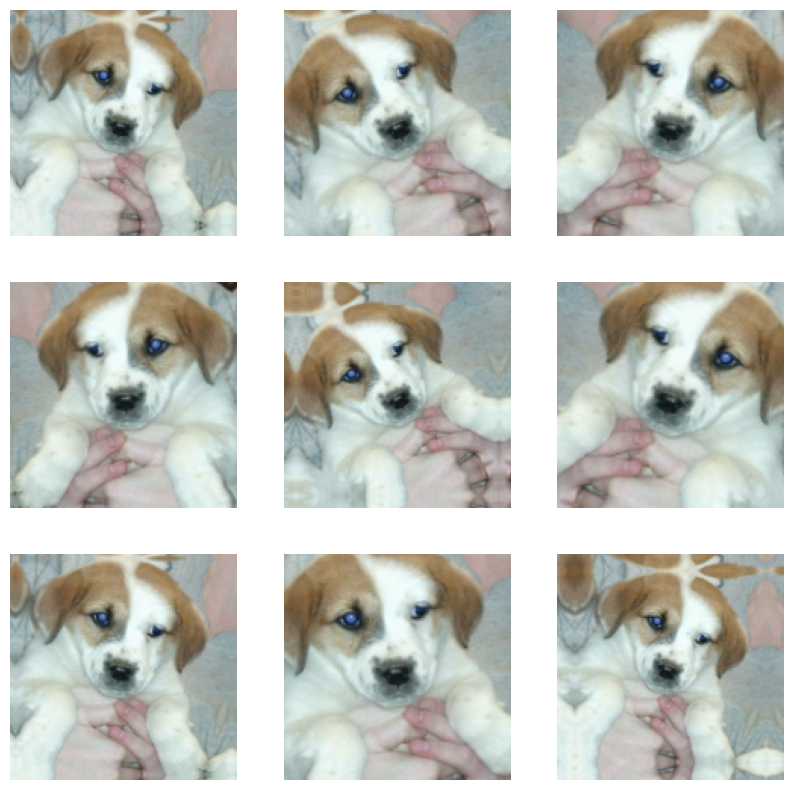

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
# Example of applying augmentation:
# for images, labels in train_dataset.take(1):  # Take one batch
#     augmented_images = data_augmentation(images)
#     # ... use augmented_images in training loop ...

2025-02-15 02:29:18.407083: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
# 4. Prefetching (Essential for Performance)
# train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


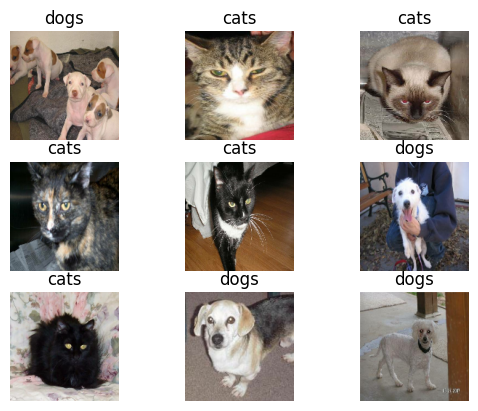

In [11]:
# 5. Display a few good images 
for images, labels in train_dataset.take(1):
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])]) # Convert to int for indexing
        plt.axis("off")
    plt.show()

In [12]:
# # 2. Build CNN Model
# model = tf.keras.Sequential([
#     # data_augmentation(),
#     tf.keras.layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)), # Normalize pixel values
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     # tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (1 neuron for binary)
# ])

/usr/local/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
inputs = tf.keras.Input(shape=(image_height, image_width, 3))
x = data_augmentation(inputs)
x = tf.keras.layers.Rescaling(1./255)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984,897 (3.76 MB)

 Trainable params: 984,897 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 3. Model Compilation
# model.compile(
#     optimizer='adam',  # We can experiment with other optimizers
#     loss='binary_crossentropy', # Let's use 'categorical_crossentropy' for > 2 classes
#     metrics=['accuracy']
# )
model.compile(
    optimizer='rmsprop',  # We can experiment with other optimizers
    loss='binary_crossentropy', # Let's use 'categorical_crossentropy' for > 2 classes
    metrics=['accuracy']
)

In [31]:
epochs = 100         # Adjust as needed

# 4. Model Training
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5123 - loss: 0.6974 - val_accuracy: 1.0000 - val_loss: 0.6217
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5707 - loss: 0.6820 - val_accuracy: 0.6683 - val_loss: 0.5842
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6332 - loss: 0.6382 - val_accuracy: 0.6927 - val_loss: 0.5891
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6737 - loss: 0.6043 - val_accuracy: 0.9263 - val_loss: 0.2871
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6960 - loss: 0.5781 - val_accuracy: 0.4510 - val_loss: 0.9111
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7260 - loss: 0.5544 - val_accuracy: 0.9475 - val_loss: 0.1934
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7441 - loss: 0.5224 - val_accuracy: 0.9432 - val_loss: 0.1563
Epoch 8/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.7509 - loss: 0.5126 - 

In [32]:

# 5. Evaluate Model 
# test_dataset = ...  # Load the test dataset

loss, accuracy = model.evaluate(test_dataset)
# loss, accuracy = model.evaluate(validation_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 6. Plot Training History (Optional but very useful)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8389 - loss: 0.7686
Test Loss: 0.52785325050354
Test Accuracy: 0.8863074779510498


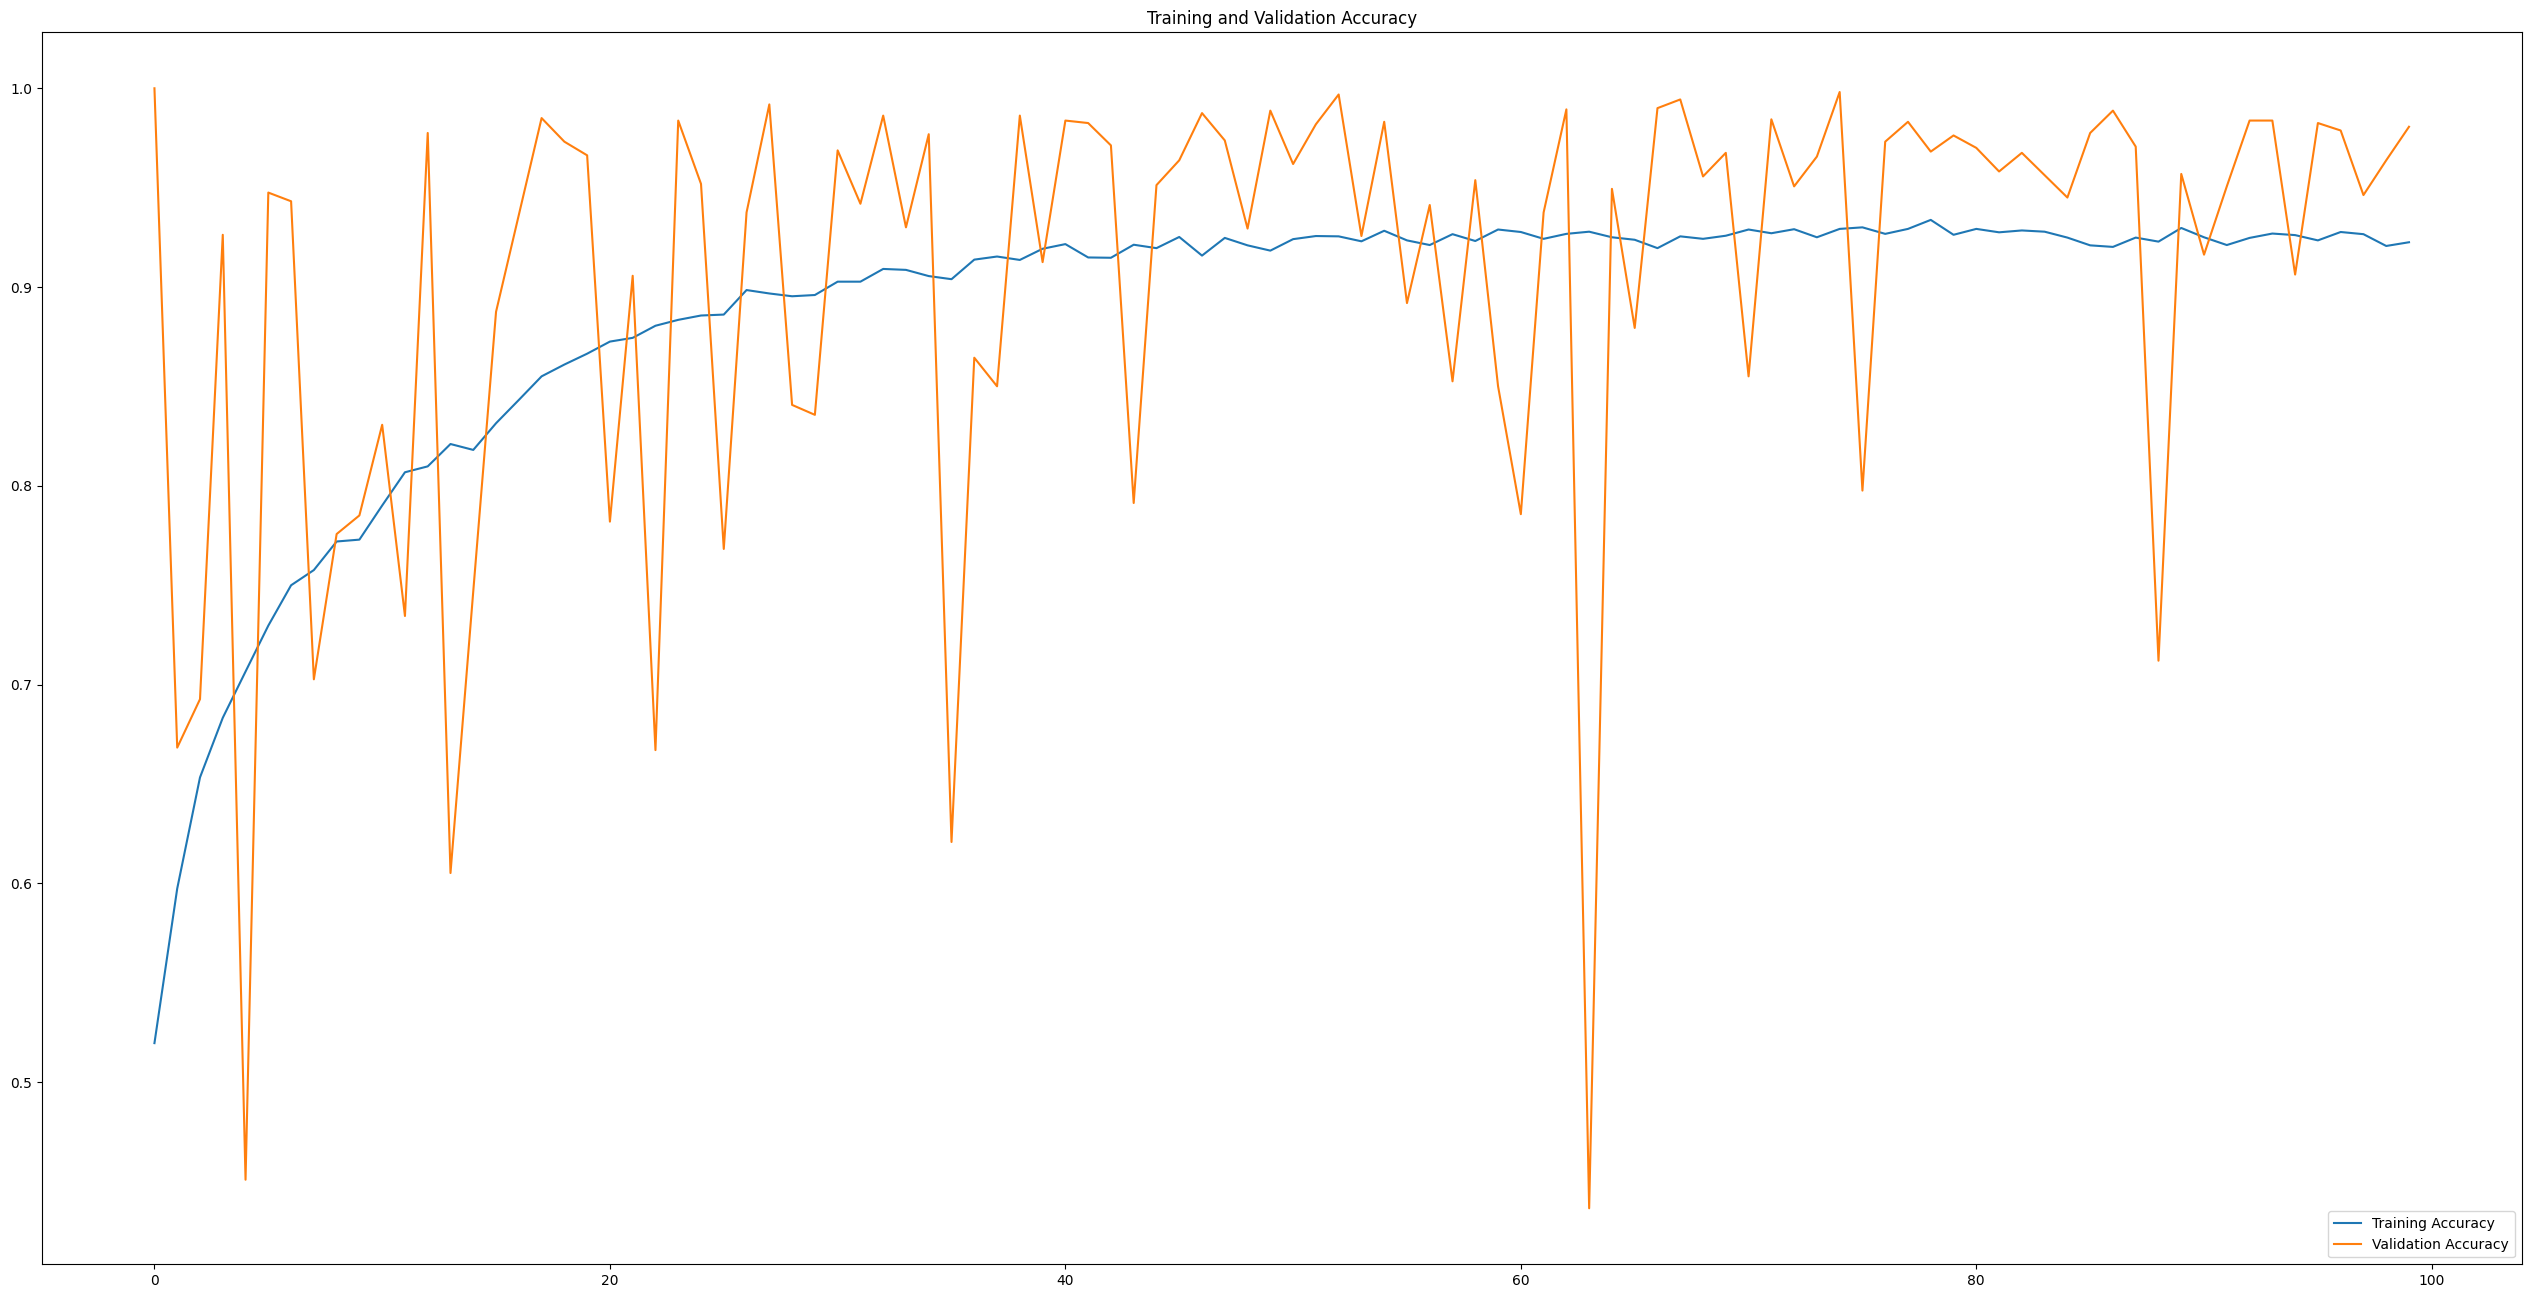

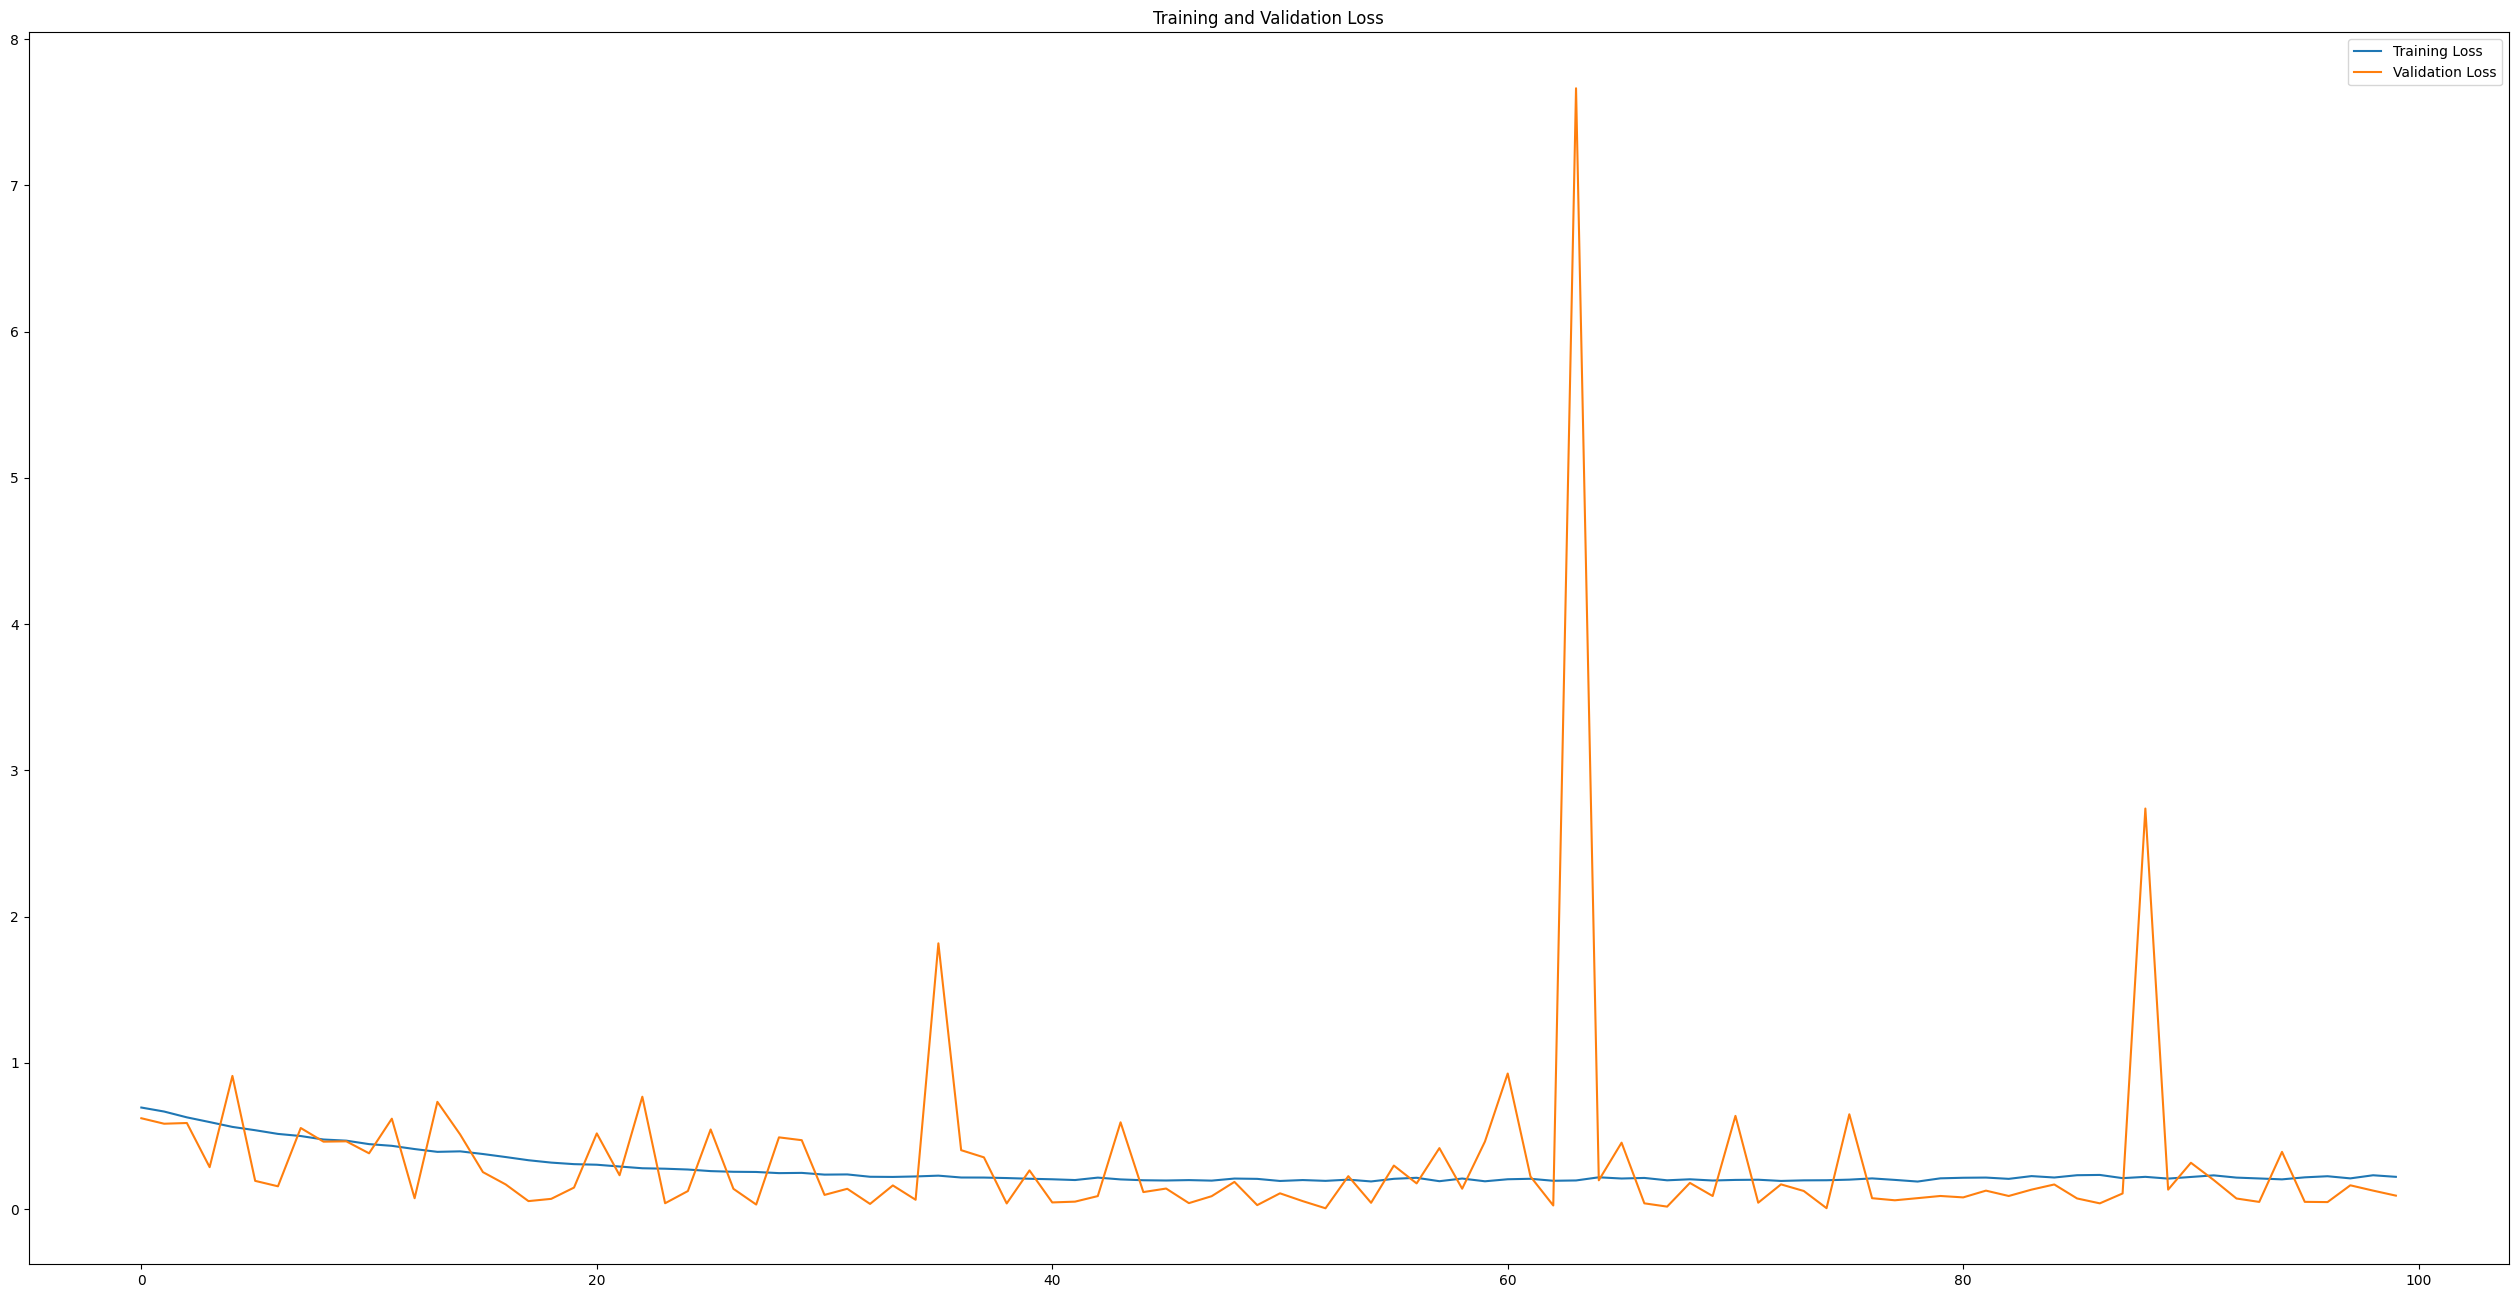

In [33]:
epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
plt.figure(figsize=(32,16))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(32,16))
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:

# 7. Save the model
# File is quite big (228 MB) 
model.save("./CatsDogs_Kaggle/KerasModel/TrainedFullModel.keras")


### Fotos propias



In [34]:
test_dataset_self = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/test_self",  # Path to test data
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False        # No need to shuffle test data
)
test_dataset_self = test_dataset_self.prefetch(buffer_size=tf.data.AUTOTUNE)



Found 9 files belonging to 2 classes.


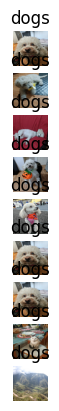

In [35]:

for images, labels in test_dataset_self.take(1):
    for i in range(len(labels)):  # Display 9 images
        ax = plt.subplot(len(labels), 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])]) # Convert to int for indexing
        plt.axis("off")
    plt.show()

In [36]:
loss, accuracy = model.evaluate(test_dataset_self)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 6. Plot Training History (Optional but very useful)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6667 - loss: 0.5867
Test Loss: 0.5867135524749756
Test Accuracy: 0.6666666865348816
